In [54]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [55]:
customers = pd.read_csv('Ecommerce Customers')

In [56]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [57]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [58]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


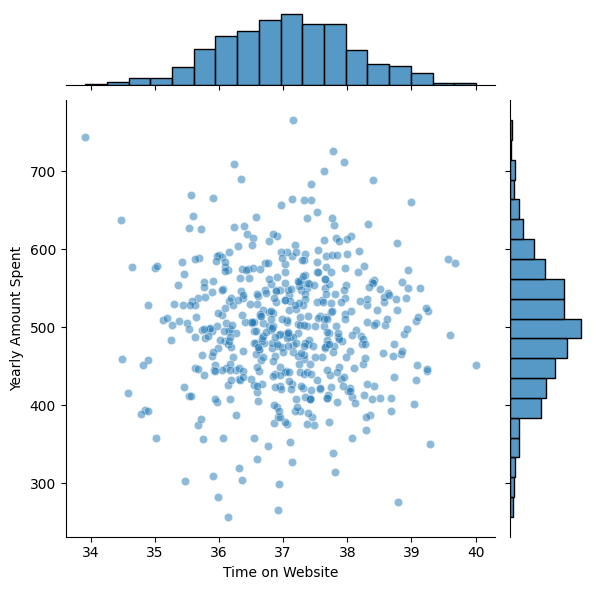

In [59]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = customers, alpha = 0.5)

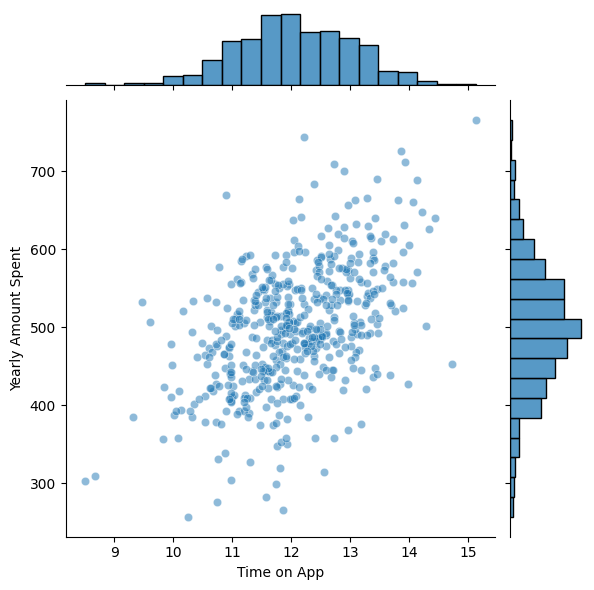

In [60]:
# time on app vs yearly amount spent
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, alpha = 0.5)

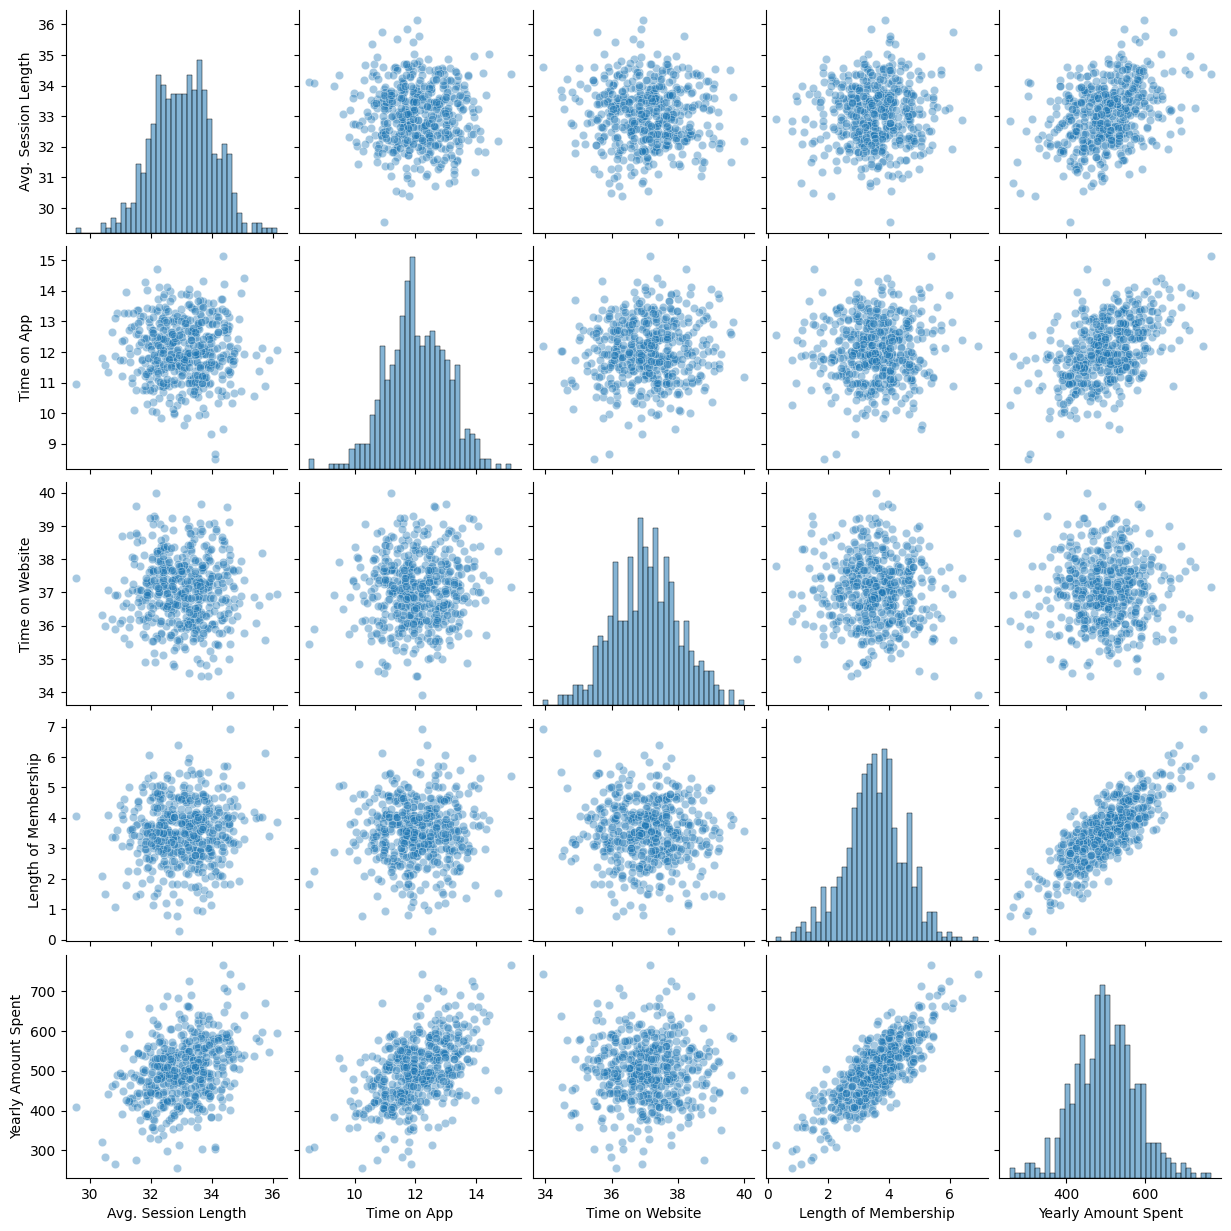

In [61]:
sns.pairplot(customers, kind='scatter', plot_kws={'alpha':0.4}, diag_kws={'alpha':0.55, 'bins':40})

Remove non numeric datas

In [62]:
non_numeric_cols = customers.select_dtypes(exclude=['number']).columns
data = customers.drop(columns=non_numeric_cols)

In [63]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


Split the data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x = data.drop(['Yearly Amount Spent'], axis = 1)
y = data['Yearly Amount Spent']

In [66]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Train the model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
ln = LinearRegression()

In [69]:
ln.fit(x_train,y_train)

LinearRegression()

In [71]:
ln.coef_

array([25.49411926, 38.47836673,  0.35962015, 61.57700441])

Prediction

In [107]:
predictions = ln.predict(x_test)

In [108]:
predictions

array([561.71890814, 564.04991745, 530.43106102, 483.75107457,
       564.31184056, 394.65833524, 518.86836287, 588.2255623 ,
       393.54378278, 580.07683503, 355.76701072, 518.05788228,
       764.11128973, 463.40941424, 531.61745076, 522.44001543,
       486.20317068, 551.63766576, 459.62929549, 555.14175671,
       474.41238422, 499.84530862, 379.39008065, 406.31833358,
       433.46120886, 465.06213445, 605.56990046, 431.63957343,
       437.15995264, 476.97430819, 487.46430289, 633.41486594,
       553.26157046, 380.26432694, 503.24041987, 593.283807  ,
       391.21303286, 283.94094482, 506.44797194, 548.96842117,
       341.60700727, 506.97578708, 500.61874324, 408.88158357,
       427.12122562, 455.2756583 , 442.60534081, 461.19671745,
       466.38515166, 541.57330489, 481.19427381, 448.75558643,
       449.28184178, 638.1701078 , 351.98997437, 429.63629832,
       408.13652437, 600.52426008, 542.67418813, 313.44318849,
       420.3370208 , 527.15720842, 398.47668514, 450.86

Text(0.5, 1.0, 'Predictions vs Actual')

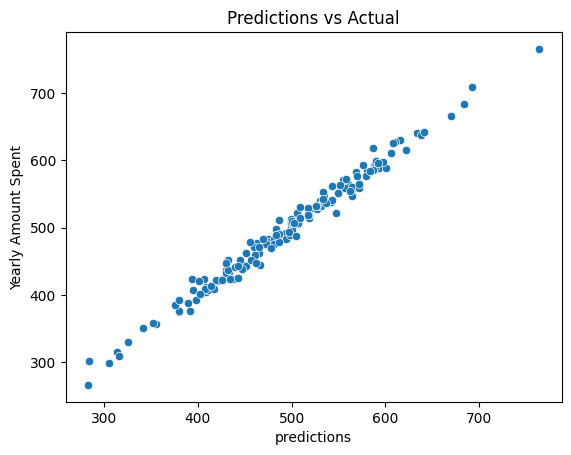

In [112]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('predictions')
plt.title('Predictions vs Actual')

In [114]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [115]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Absolute Error: 7.98554787517429
Mean Squared Error: 107.68924472962077


Evaluate

In [70]:
ln.score(x_test, y_test)

0.9852660947158927

In [72]:
predictions = ln.predict(x_test)
actual = y_test

In [101]:
tolerance = 0.1
acceptable_range = tolerance * actual

In [102]:
within_range = np.abs(predictions - actual) <= acceptable_range

In [103]:
num_correct = np.sum(within_range)
total_predictions = len(predictions)

In [104]:
print(f"Number of correct predictions within tolerance: {num_correct}")
print(f"Total number of predictions: {total_predictions}")
percentage_correct = (num_correct / total_predictions) * 100
print(f"Percentage of correct predictions within tolerance: {percentage_correct:.2f}%")

Number of correct predictions within tolerance: 150
Total number of predictions: 150
Percentage of correct predictions within tolerance: 100.00%
